## Imports

In [1]:
import os
import pysam
import pickle
import random
import warnings
import plotnine
import pybedtools
import numpy as np
import tabix as tb
import pandas as pd
from plotnine import *
from pandas import Series
from kerasAC.splits import *
from viz_preprocess import *
from matplotlib import pyplot as plt
from modisco.visualization import viz_sequence
from deeplift.dinuc_shuffle import dinuc_shuffle

np.random.seed(1234)
plt.style.use('default')

TF-MoDISco is using the TensorFlow backend.


## Create Directories

In [ ]:
#! /users/soumyak/alzheimers_parkinsons/gkmSVM/make_dirs.sh

## Generate Positive Sets

In [ ]:
#! python /users/soumyak/alzheimers_parkinsons/gkmSVM/gen_positives.py

## Generate Negative Sets

In [ ]:
#! python /users/soumyak/alzheimers_parkinsons/gkmSVM/run_seqdataloader.py

## Preprocess Inputs for training and testing

In [ ]:
#! python /users/soumyak/alzheimers_parkinsons/gkmSVM/preprocess_gkm.py

## Train + Test + Evaluate gkmSVM

In [ ]:
#! python /users/soumyak/alzheimers_parkinsons/gkmSVM/run_gkmsvm.py 24 all

## Get Peak Sets with GWAS intersections

In [ ]:
#! /users/soumyak/alzheimers_parkinsons/gkmSVM/get_gwas_inputs.py

## Interpret SVM using gkmExplain

In [ ]:
#! python /users/soumyak/alzheimers_parkinsons/gkmSVM/run_gkmexplain.py 24 all

In [ ]:
#! python /users/soumyak/alzheimers_parkinsons/gkmSVM/run_gkmexplain.py 24 all

## Concatenate Outputs

In [ ]:
#! python concatenate_outputs.py 24 all
#! python concatenate_outputs.py 24 all

## Visualization Preprocess

In [7]:
cluster = '24'
fold = '1'

ref_fasta = '/mnt/lab_data3/soumyak/adpd/gkmSVM/Cluster'+cluster+'/fold'+fold+'/test/ref.pos.fasta'
ref_seqs = [x.rstrip() for (i,x) in enumerate(open(ref_fasta)) if i%2==1]
ref_onehot = [np.array(one_hot_encode_along_channel_axis(x)) for x in ref_seqs if ('N' not in x)]

print("Num onehot sequences:", len(ref_onehot))

hyp_impscores = [w[0] for w in zip([
    np.array( [[float(z) for z in y.split(",")]
                for y in x.rstrip().split("\t")[2].split(";")])
    for x in open("/mnt/lab_data3/soumyak/adpd/gkmSVM/Cluster24/fold1/explain/output/ref/ref_hypothetical_scores.txt")
],fasta_seqs) if 'N' not in w[1]]

impscores = get_impscores(hyp_impscores, onehot_data)

assert (np.max([np.max(np.abs(z*y - x))
                for x,y,z in zip(impscores,
                                 onehot_data,
                                 hyp_impscores)])) == 0

normed_impscores, normed_hyp_impscores = normalize_scores(
  impscores=impscores, hyp_impscores=hyp_impscores, onehot_data=onehot_data)

Num onehot sequences: 785


## Visualize Top Sequences

Idx 232 total imp 4.879486813369001
Before normalization


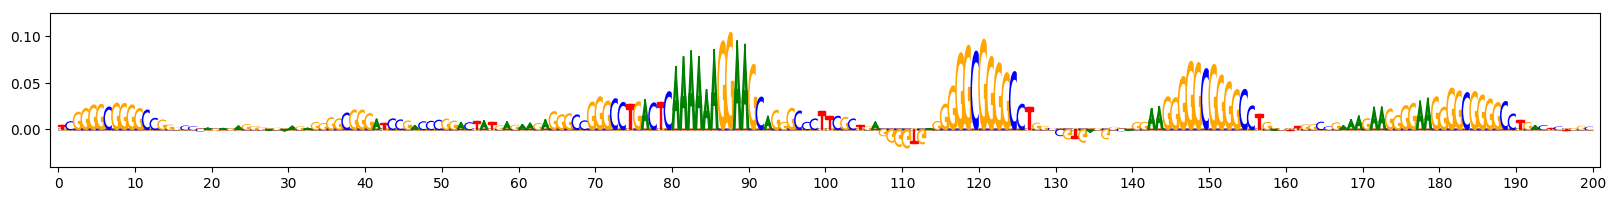

After normalization


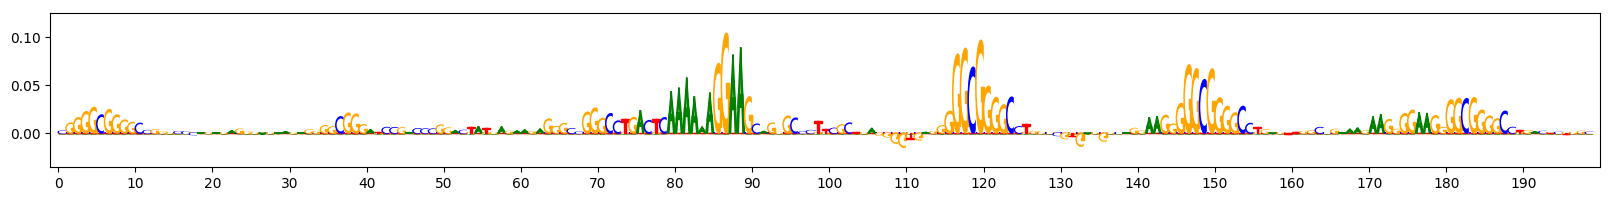

Idx 526 total imp 3.821468347351
Before normalization


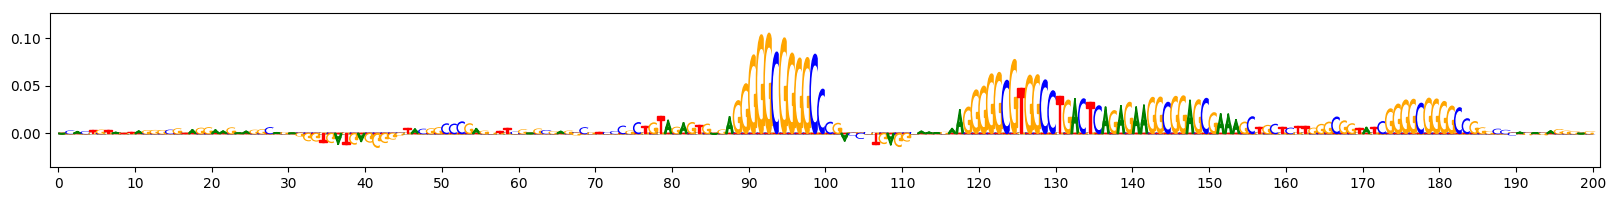

After normalization


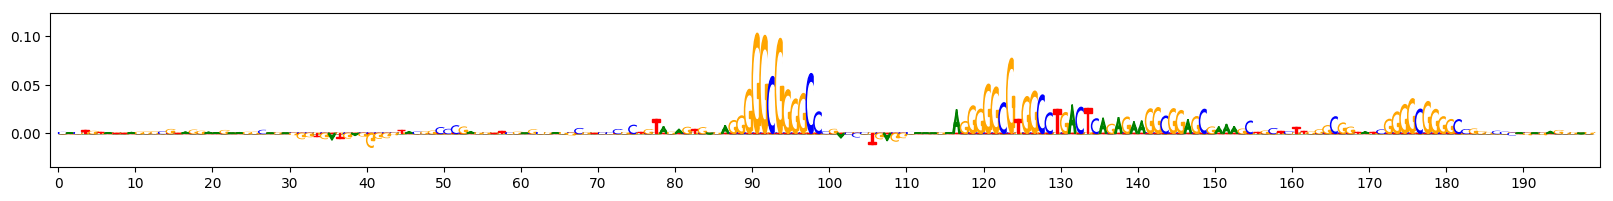

Idx 651 total imp 3.6113429030899997
Before normalization


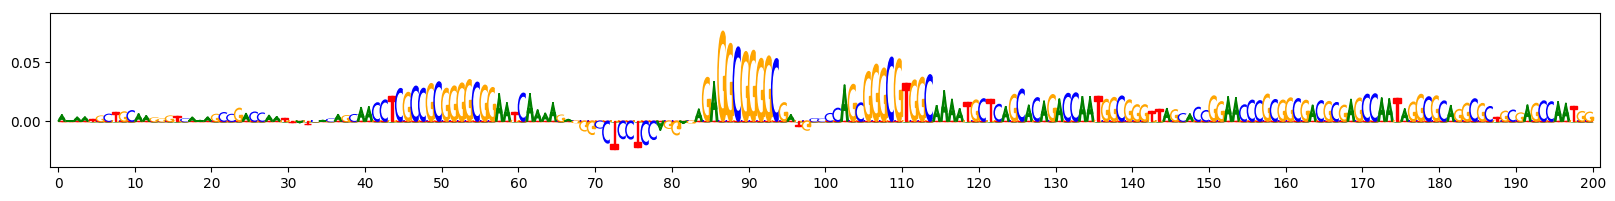

After normalization


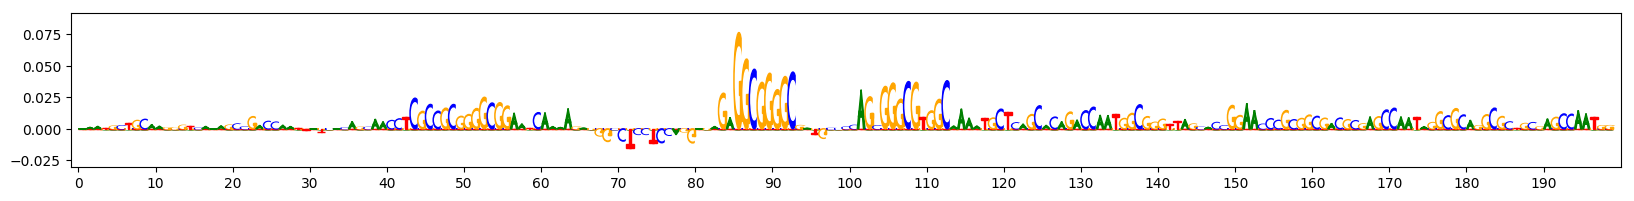

Idx 580 total imp 3.22868381111
Before normalization


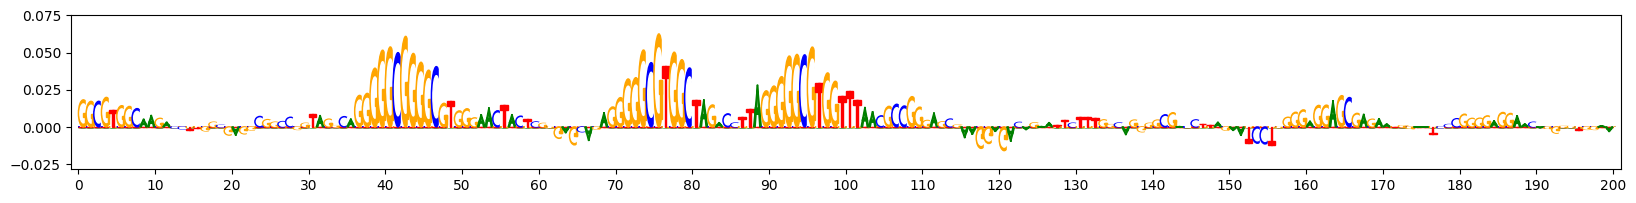

After normalization


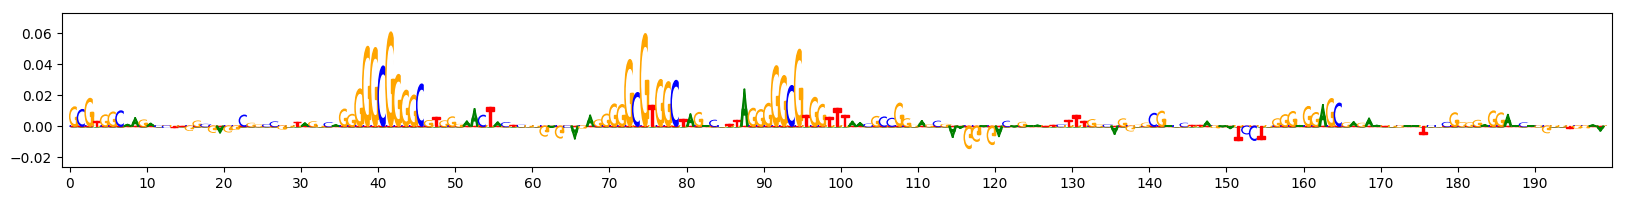

Idx 773 total imp 3.1665285146
Before normalization


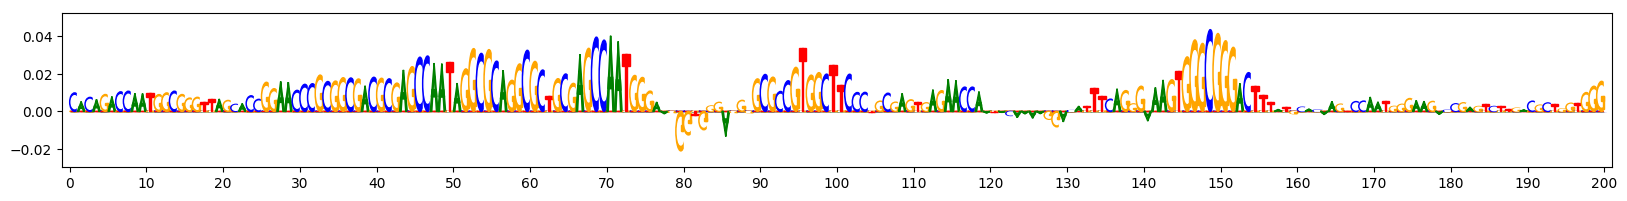

After normalization


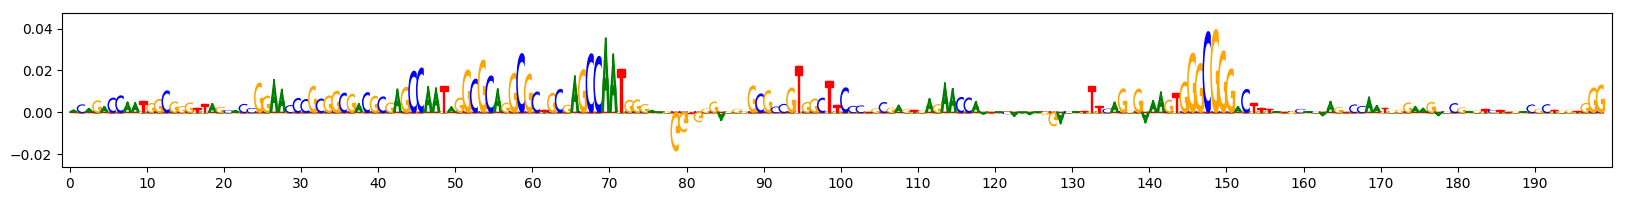

In [9]:
sorted_indices = [x[0] for x in
                  sorted(enumerate([np.sum(x) for x in impscores]),
                         key=lambda x: -x[1])]
for idx in sorted_indices[:5]:
    print("Idx",idx,"total imp",np.sum(impscores[idx]))
    print("Before normalization")
    viz_sequence.plot_weights(impscores[idx][400:600], subticks_frequency=10)
    print("After normalization")
    viz_sequence.plot_weights(normed_impscores[idx][401:600], subticks_frequency=10)

In [11]:
#read in the fasta files and one-hot encode
fasta_seqs = [x.rstrip() for (i,x) in enumerate(open("/mnt/lab_data3/soumyak/adpd/gkmSVM/Cluster24/fold1/test/alt.pos.fasta"))
              if i%2==1]
#filter out any sequences that contain 'N's
onehot_data = [np.array(one_hot_encode_along_channel_axis(x))
                         for x in fasta_seqs if ('N' not in x)]
print("Num onehot sequences:",len(onehot_data))

#read in the importance scores and hypothetical importance scores
#filter out any sequences that contain 'N's
hyp_impscores = [w[0] for w in zip([
    np.array( [[float(z) for z in y.split(",")]
                for y in x.rstrip().split("\t")[2].split(";")])
    for x in open("/mnt/lab_data3/soumyak/adpd/gkmSVM/Cluster24/fold1/explain/output/alt/alt_hypothetical_scores.txt")
],fasta_seqs) if 'N' not in w[1]]

impscores = [w[0] for w in zip([
    np.array( [[float(z) for z in y.split(",")]
                for y in x.rstrip().split("\t")[2].split(";")])
    for x in open("/mnt/lab_data3/soumyak/adpd/gkmSVM/Cluster24/fold1/explain/output/alt/alt_importance_scores.txt")
],fasta_seqs) if 'N' not in w[1]]

#Perform a sanity check to make sure that the importance score are the same as the
# hypothetical scores multiplied elementwise with the one-hot encoding; for this
# reason, it is not technically necessary to compute the importance scores if the
# hypothetical scores are also computed
assert (np.max([np.max(np.abs(z*y - x))
                for x,y,z in zip(impscores,
                                 onehot_data,
                                 hyp_impscores)]))==0

Num onehot sequences: 785


In [12]:
normed_impscores, normed_hyp_impscores = normalize_scores(
  impscores=impscores, hyp_impscores=hyp_impscores, onehot_data=onehot_data)

Idx 232 total imp 4.970175039942
Before normalization


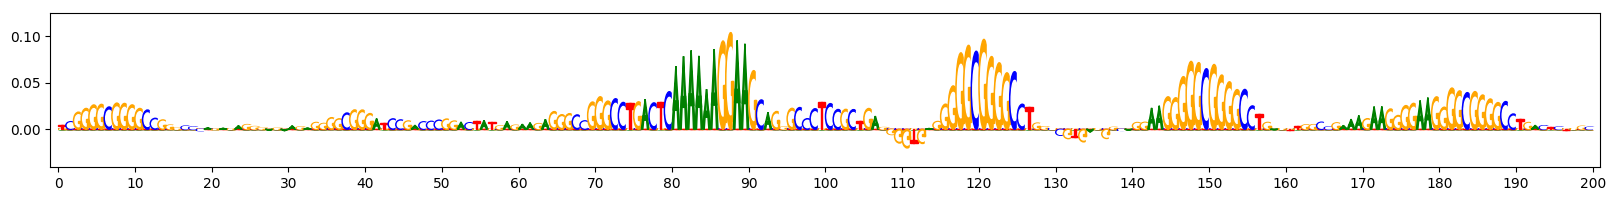

After normalization


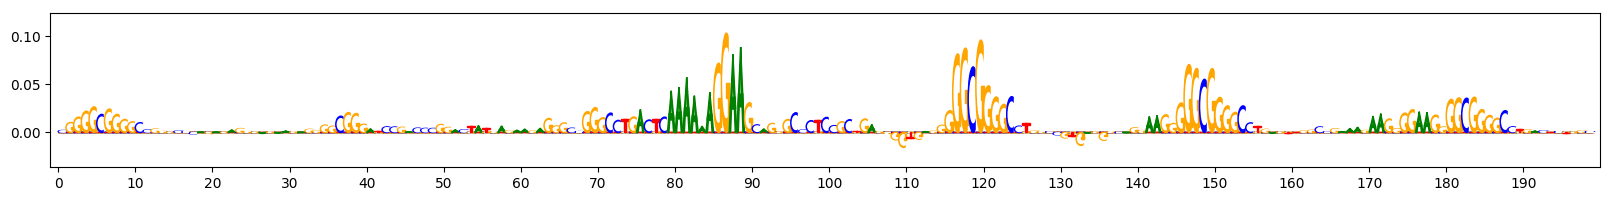

Idx 526 total imp 3.8795398610405
Before normalization


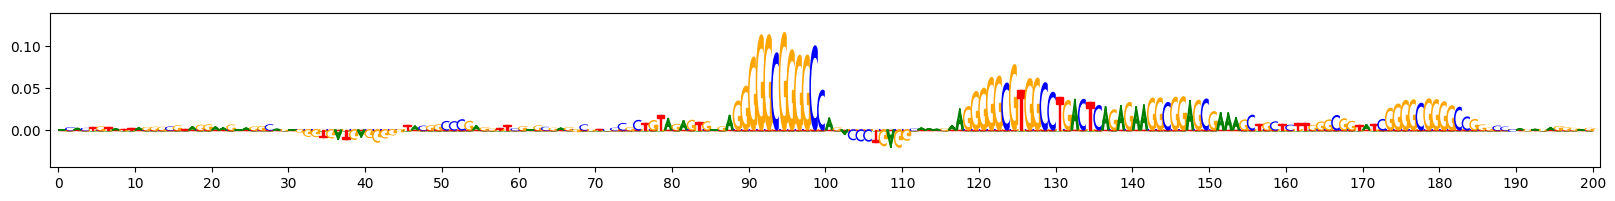

After normalization


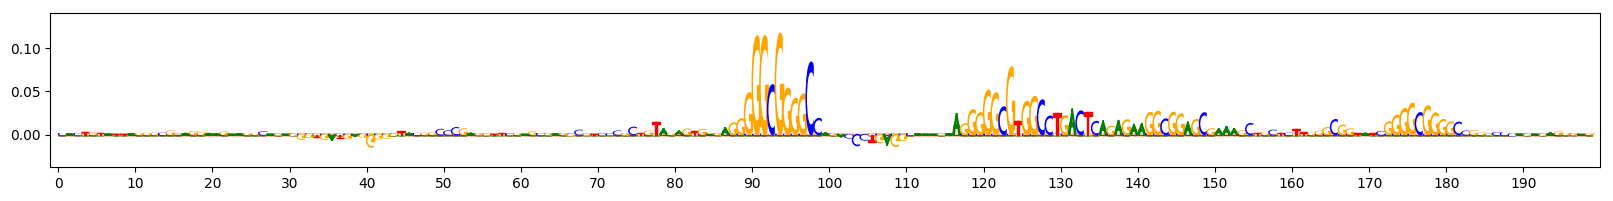

Idx 651 total imp 3.6459756812600004
Before normalization


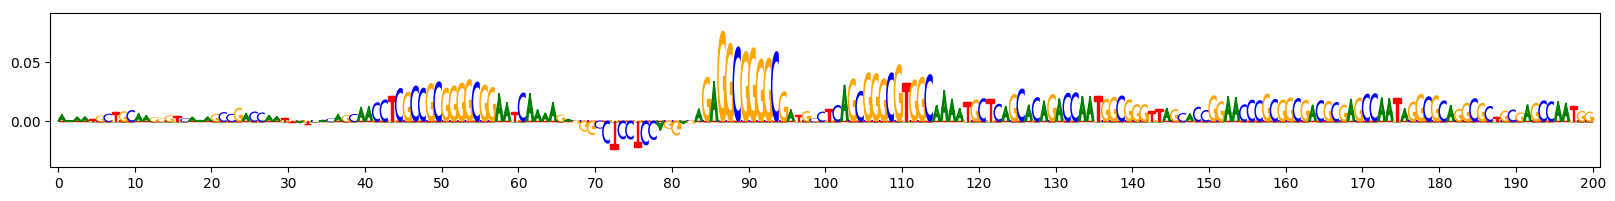

After normalization


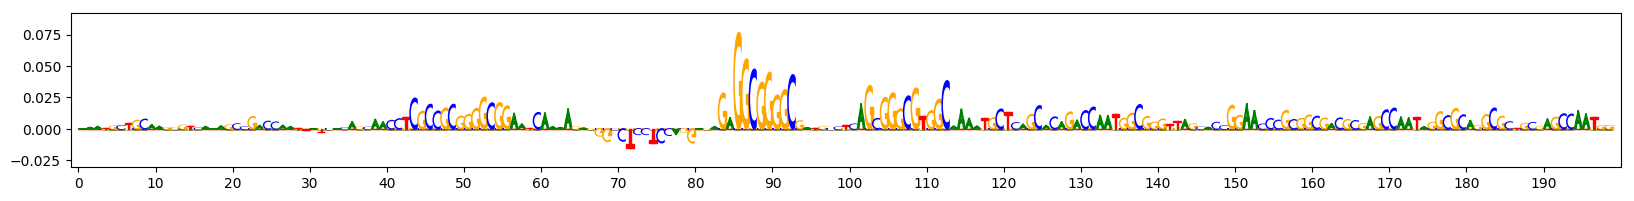

Idx 157 total imp 3.3396795948060003
Before normalization


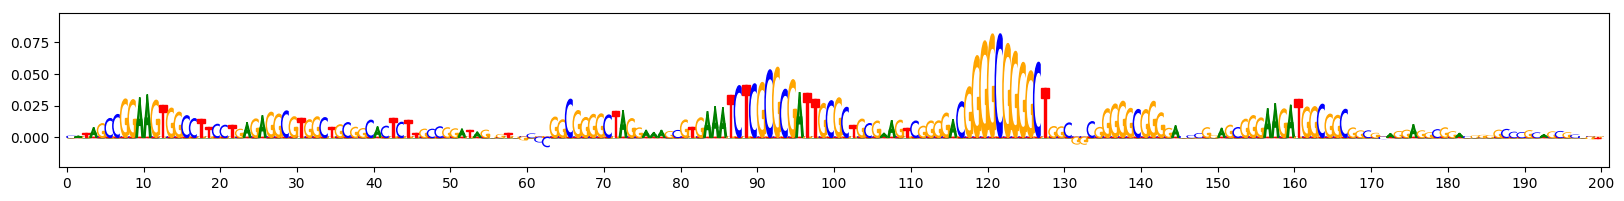

After normalization


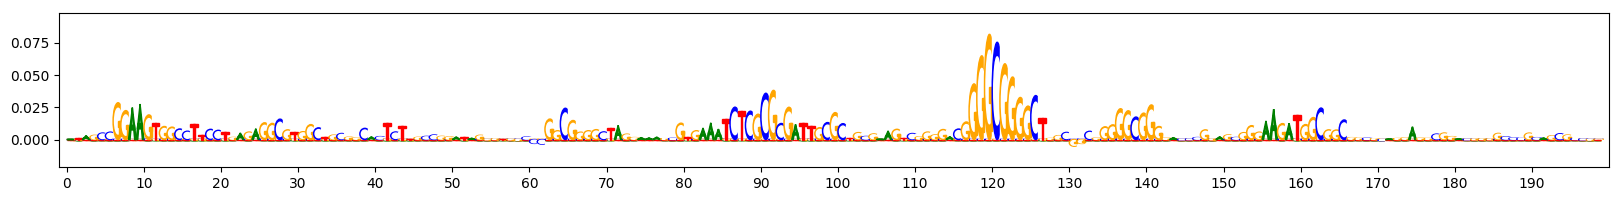

Idx 158 total imp 3.2240513755929996
Before normalization


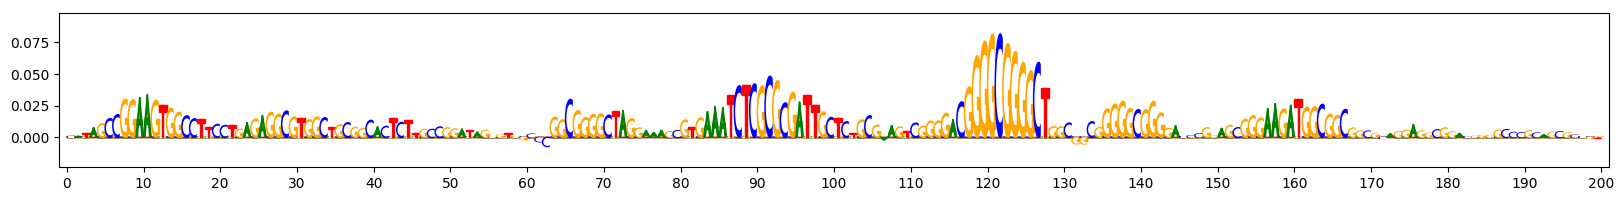

After normalization


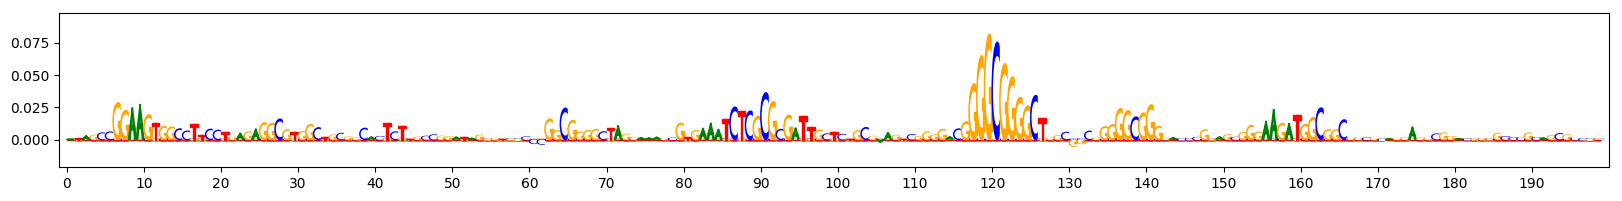

In [13]:
sorted_indices = [x[0] for x in
                  sorted(enumerate([np.sum(x) for x in impscores]),
                         key=lambda x: -x[1])]
for idx in sorted_indices[:5]:
    print("Idx",idx,"total imp",np.sum(impscores[idx]))
    print("Before normalization")
    viz_sequence.plot_weights(impscores[idx][400:600], subticks_frequency=10)
    print("After normalization")
    viz_sequence.plot_weights(normed_impscores[idx][401:600], subticks_frequency=10)